first we start by importting our libs

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

now we will read the data

In [7]:
data = pd.read_csv('assets\diabetes.csv')

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

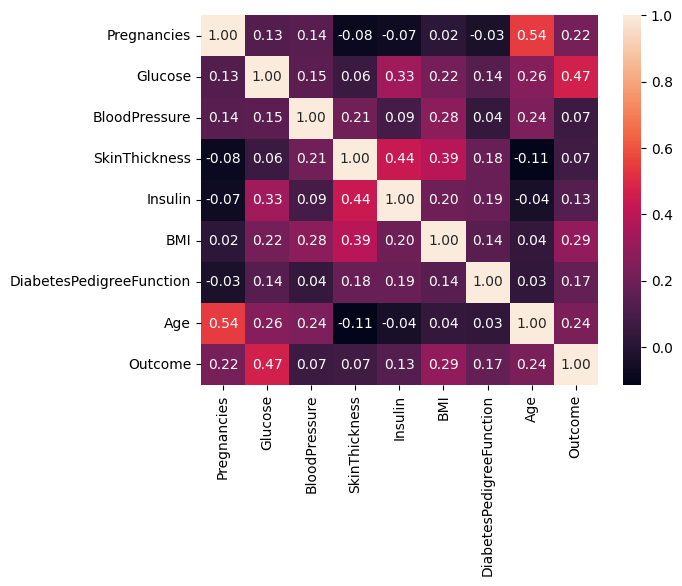

In [9]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

bad look, data have too many problem


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
num= data[data["SkinThickness"]==0]
num1= data[data["BloodPressure"]==0]
num2= data[data["Glucose"]==0]
num3= data[data["Insulin"]==0]
num4= data[data["BMI"]==0]
num.shape,num1.shape,num2.shape,num3.shape,num4.shape

((227, 9), (35, 9), (5, 9), (374, 9), (11, 9))

columns must not be equal to zero

In [17]:
data[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']] = data[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].replace(0, np.nan)

In [18]:
data[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']] = data[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].fillna(data[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].mean())

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  
data_imputed = imputer.fit_transform(data)

data = pd.DataFrame(data_imputed, columns=data.columns)

In [20]:
num= data[data["SkinThickness"]==0]
num1= data[data["BloodPressure"]==0]
num2= data[data["Glucose"]==0]
num3= data[data["Insulin"]==0]
num4= data[data["BMI"]==0]
num.shape,num1.shape,num2.shape,num3.shape,num4.shape

((0, 9), (0, 9), (0, 9), (0, 9), (0, 9))

let see the data if balance or not

In [21]:
# Split the data into training and testing sets
X = data.drop(columns=['Outcome'])
y = data['Outcome']

<AxesSubplot: xlabel='Outcome', ylabel='count'>

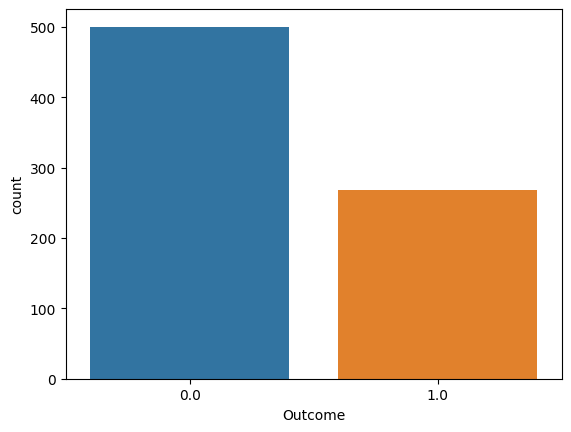

In [22]:
sns.countplot(data=data,x=y)

Random Over Sampler is a technique used in imbalanced classification problems, where the number of examples in one class is significantly lower than the other. This technique aims to balance the class distribution by randomly oversampling minority class examples.

In [23]:
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

<AxesSubplot: xlabel='Outcome', ylabel='count'>

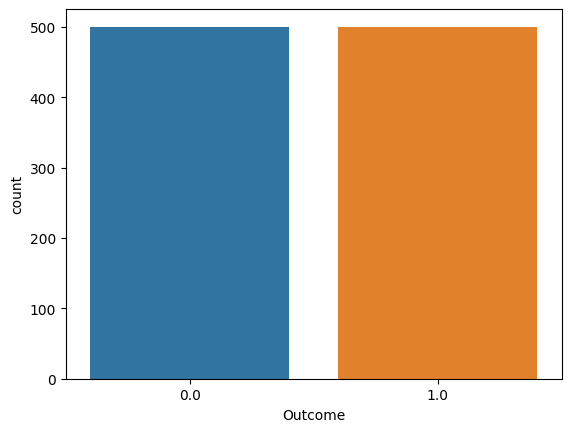

In [24]:
sns.countplot(data=data,x=y_ros)

In [25]:
from keras.callbacks import EarlyStopping

In [26]:
X_temp, X_test, y_temp, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

In [27]:
# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
model = Sequential([
    Dense(150,activation='relu',name='a1',input_shape=(X_train.shape[1],)),
    Dense(100,activation='relu',name='a2'),
    Dense(50,activation='relu',name='a3'),
    Dense(25,activation='relu',name='a4'),
    Dense(1,activation='sigmoid',name='a5')    
]
)

In [29]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [30]:
def lr_schedule(epoch, lr):
    if epoch < 11:
        return lr
    else:
        return lr * 0.993

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler]
)

train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 0.6129 - accuracy: 0.6792 - val_loss: 0.5503 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.7542 - val_loss: 0.5351 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4698 - accuracy: 0.7847 - val_loss: 0.5301 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.7917 - val_loss: 0.5259 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.7903 - val_loss: 0.5258 - val_accuracy: 0.7556 - lr: 0.0010
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.7931 - val_loss: 0.5225 - val_accuracy: 0.7611 - lr: 0.0010
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4108 - 

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]= 1
    else:
        y_pred[i]= 0

4/4 [==============================] - 0s 2ms/step


In [33]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Confusion Matrix:
[[44 10]
 [ 3 43]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        54
         1.0       0.81      0.93      0.87        46

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



<AxesSubplot: >

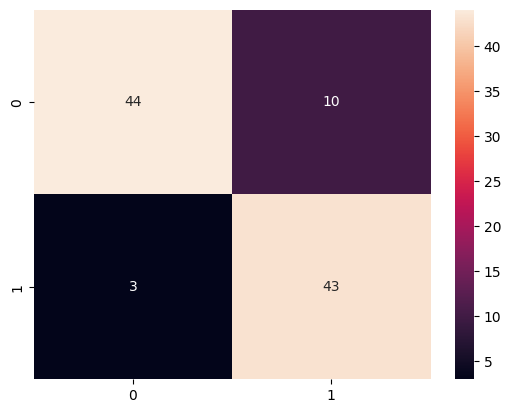

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)